In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris_load = load_iris()
iris = pd.DataFrame(iris_load.data, columns= iris_load.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
[col for col in iris.columns]
iris['class'] = pd.Series(iris_load.target)
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


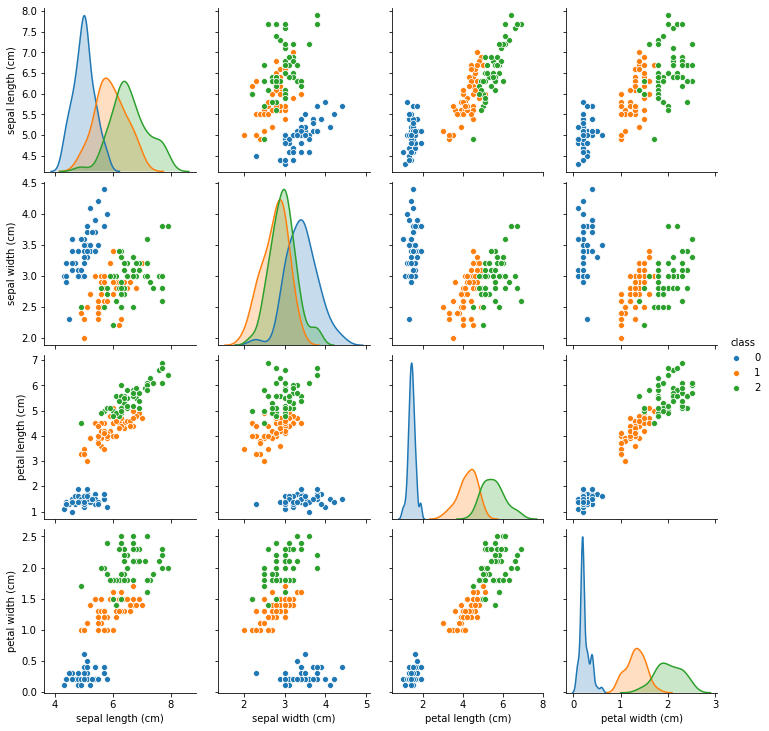

In [10]:
sns.pairplot(iris,hue='class')

In [11]:
from sklearn.model_selection import train_test_split

x=iris.iloc[:,:-1]
y=iris.iloc[:,4]
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.25)

In [12]:
from sklearn.svm import SVC

clf = SVC()
# clf = svm.SVC(kernel='linear')
# clf = svm.SVC(kernel='rbf') # Radial Basis Function Kernel

In [13]:
clf.fit(x_train, y_train)

SVC()

In [14]:
y_pred = clf.predict(x_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[16  0  0]
 [ 0 10  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



# Classifying Benign and Non-Benign Cancer Tumors

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [20]:
breast_cancer = load_breast_cancer()
features_df = pd.DataFrame(breast_cancer.data, columns= breast_cancer.feature_names)
features_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
X = features_df[['mean area','mean compactness']]
label_df = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
Y =pd.get_dummies(label_df, drop_first= True)
X.head()

,mean area,mean compactness
0,1001.0,0.27760
1,1326.0,0.07864
2,1203.0,0.15990
3,386.1,0.28390
4,1297.0,0.13280


In [22]:
Y.head()

,benign
0,0
1,0
2,0
3,0
4,0


In [23]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, random_state=1)

In [24]:
from sklearn import svm 

clf = svm.SVC(kernel='linear')

clf.fit(X_train, Y_train)

Y_pred =clf.predict(X_test)
Y_predall = clf.predict(X)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test,Y_pred))

[[43 12]
 [ 5 83]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.83        55
           1       0.87      0.94      0.91        88

    accuracy                           0.88       143
   macro avg       0.88      0.86      0.87       143
weighted avg       0.88      0.88      0.88       143



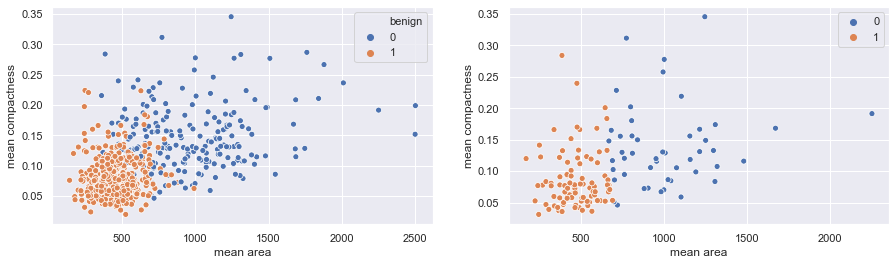

In [26]:
fig, axs = plt.subplots(1,2, figsize=(15,4))

sns.scatterplot(x= features_df['mean area'], y= features_df['mean compactness'], hue= Y['benign'], ax=axs[0])
sns.scatterplot(x= X_test['mean area'], y= X_test['mean compactness'], hue =Y_pred, ax=axs[1])

In [27]:
confusion_matrix(Y_test,Y_pred)

array([[43, 12],
       [ 5, 83]], dtype=int64)